## Gerekli kütüphaneler:
Daha önce eğitilmiş olan modelin değerlendirilmesi için gerekli kütüphaneler içe aktarılır. 

In [1]:
import sys

sys.path.append("../..")

import os
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

## Test verisini yükleme:
Kaydedilmiş test özellikleri `X_test_pca` ve etiketler `y_test`, `.npy` dosyalarından yüklenir.


In [2]:
X_test_pca = np.load("../../features/skyview_x_test.npy")
y_test = np.load("../../features/skyview_y_test.npy")

## Test verisinin yüklenmesi:
 Test veri klasörünün yolu tanımlanır ve klasör adları alfabetik sıralanarak sınıf etiketleri `classes` elde edilir.

In [3]:
test_dir = "../../data/skyview"
classes = sorted(os.listdir(test_dir))

## Modellerin yüklenmesi ve test edilmesi:
Kaydedilmiş üç model (Gradient Boosting, MLP, Random Forest) yüklenir. Her model test verisi üzerinde tahmin yapar, sınıf bazlı performans raporu `classification_report` ve karışıklık matrisi `confusion_matrix` görselleştirilir.


Model: skyview_gb.pkl
              precision    recall  f1-score   support

 Agriculture       0.72      0.68      0.70       160
     Airport       0.50      0.47      0.49       160
       Beach       0.79      0.77      0.78       160
        City       0.71      0.81      0.76       160
      Desert       0.90      0.96      0.93       160
      Forest       0.90      0.93      0.91       160
   Grassland       0.85      0.89      0.87       160
     Highway       0.72      0.68      0.70       160
        Lake       0.80      0.79      0.80       160
    Mountain       0.69      0.76      0.72       160
     Parking       0.83      0.85      0.84       160
        Port       0.86      0.80      0.83       160
     Railway       0.70      0.63      0.66       160
 Residential       0.87      0.90      0.88       160
       River       0.58      0.54      0.56       160

    accuracy                           0.76      2400
   macro avg       0.76      0.76      0.76      2400
wei

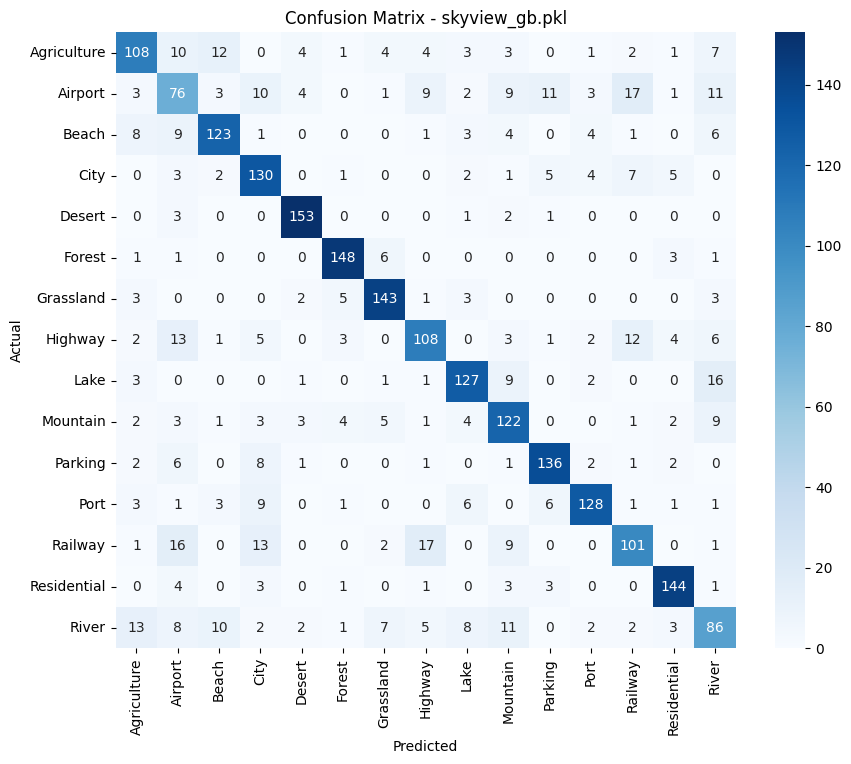


Model: skyview_mlp.pkl
              precision    recall  f1-score   support

 Agriculture       0.39      0.36      0.38       160
     Airport       0.27      0.52      0.35       160
       Beach       0.63      0.54      0.58       160
        City       0.59      0.53      0.56       160
      Desert       0.91      0.86      0.88       160
      Forest       0.61      0.76      0.68       160
   Grassland       0.80      0.66      0.72       160
     Highway       0.37      0.27      0.31       160
        Lake       0.49      0.45      0.47       160
    Mountain       0.36      0.51      0.42       160
     Parking       0.61      0.62      0.62       160
        Port       0.66      0.67      0.67       160
     Railway       0.42      0.33      0.37       160
 Residential       0.57      0.53      0.55       160
       River       0.46      0.25      0.32       160

    accuracy                           0.52      2400
   macro avg       0.54      0.52      0.52      2400
we

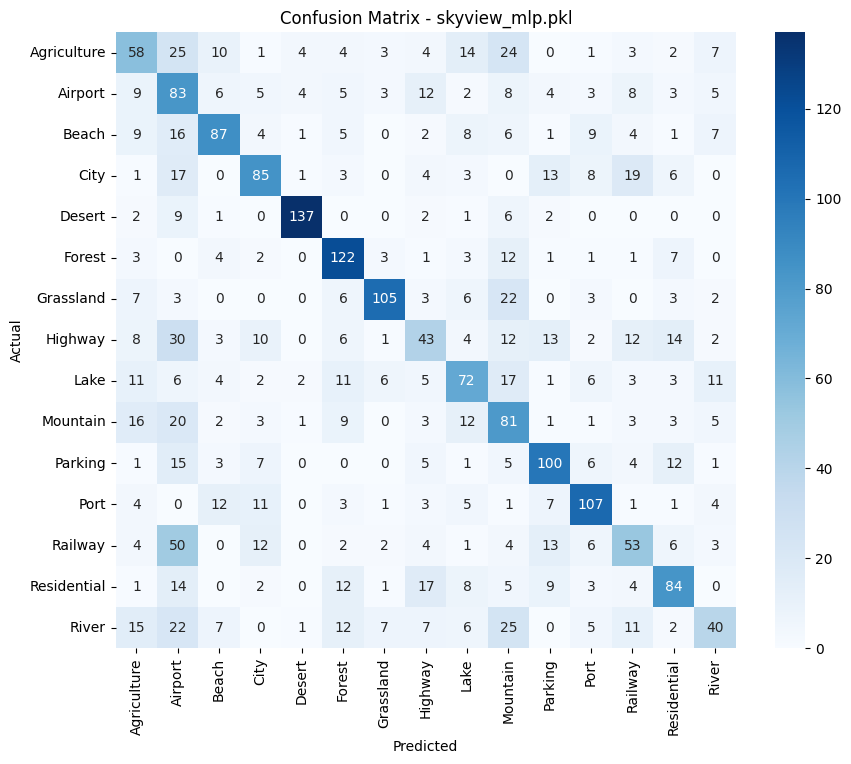


Model: skyview_rf.pkl
              precision    recall  f1-score   support

 Agriculture       0.69      0.54      0.61       160
     Airport       0.51      0.44      0.47       160
       Beach       0.68      0.74      0.71       160
        City       0.70      0.79      0.74       160
      Desert       0.87      0.96      0.91       160
      Forest       0.79      0.93      0.85       160
   Grassland       0.76      0.89      0.82       160
     Highway       0.73      0.59      0.66       160
        Lake       0.83      0.79      0.81       160
    Mountain       0.60      0.62      0.61       160
     Parking       0.82      0.85      0.84       160
        Port       0.83      0.84      0.83       160
     Railway       0.65      0.73      0.69       160
 Residential       0.84      0.84      0.84       160
       River       0.58      0.43      0.49       160

    accuracy                           0.73      2400
   macro avg       0.73      0.73      0.73      2400
wei

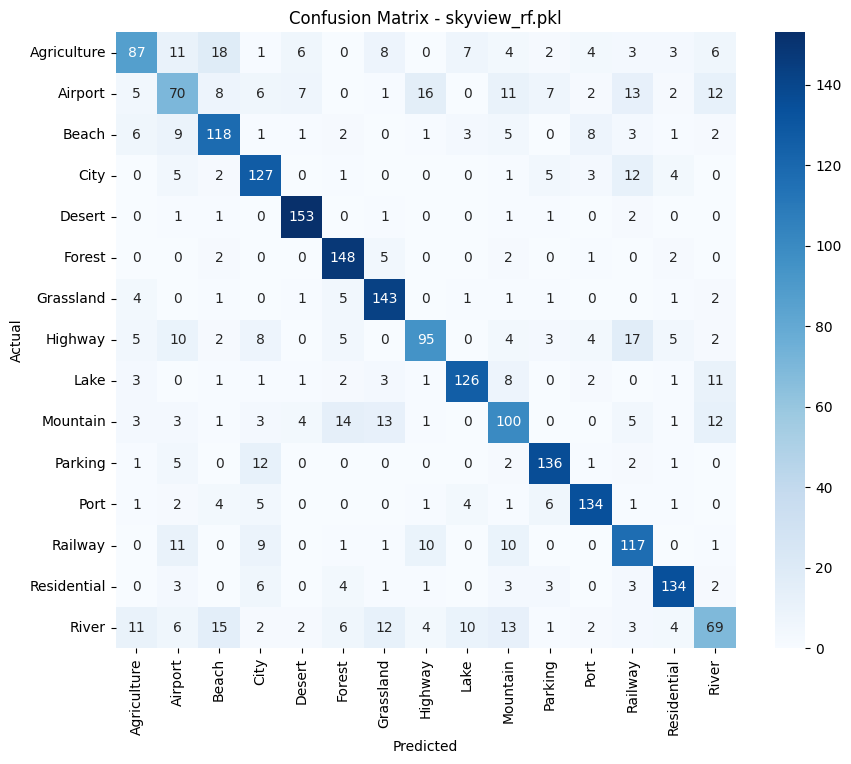

In [4]:
model_paths = [
    "../../models/ml_features/skyview_gb.pkl", ## uc_merced için uc_merced_hgb.pkl, skyview için skyview_gb.pkl
    "../../models/ml_features/skyview_mlp.pkl", 
    "../../models/ml_features/skyview_rf.pkl"
]

for path in model_paths:
    model = joblib.load(path)
    y_pred = model.predict(X_test_pca)

    print(f"\nModel: {os.path.basename(path)}")
    print(classification_report(y_test, y_pred, target_names=classes))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=classes, yticklabels=classes, cmap="Blues")
    plt.title(f"Confusion Matrix - {os.path.basename(path)}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()